In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.shape

(1030, 9)

In [4]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Model Building :

In [6]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
# Applying Regression without any transformation
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("R2 Score : ",r2_score(y_test,y_pred))

R2 Score :  0.6275531792314848


In [9]:
# Cross checking with cross val score
lr = LinearRegression()
print("Cross Val Score : ",np.mean(cross_val_score(lr,X,y,scoring='r2')))

Cross Val Score :  0.4609940491662864


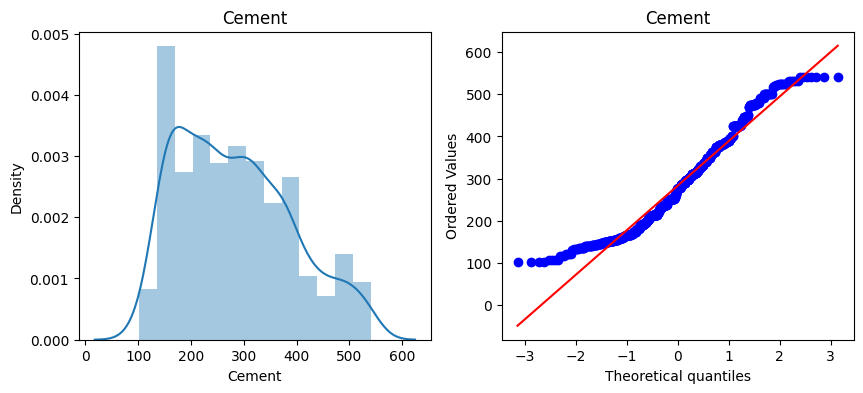

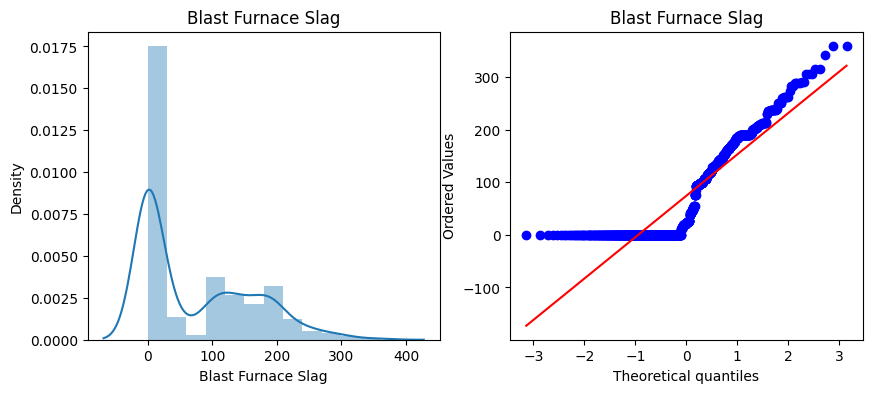

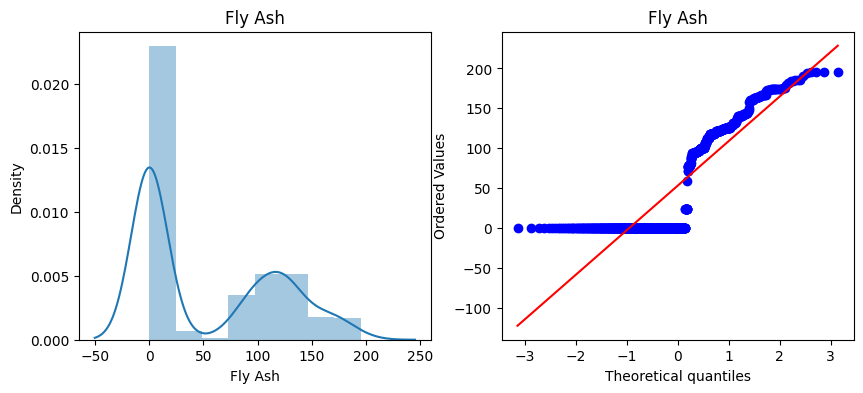

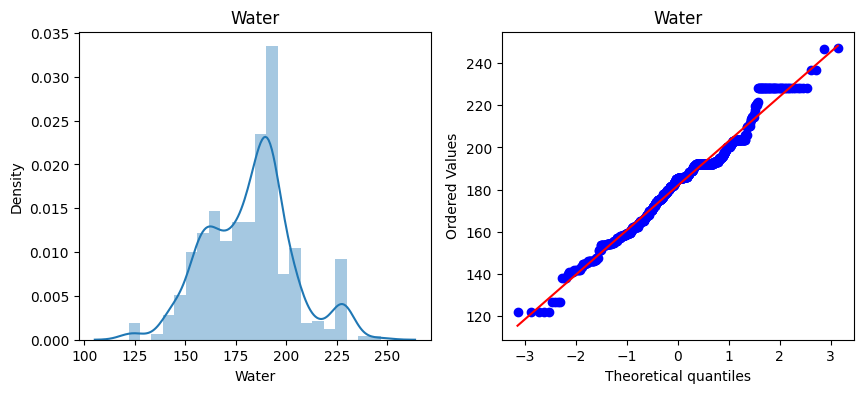

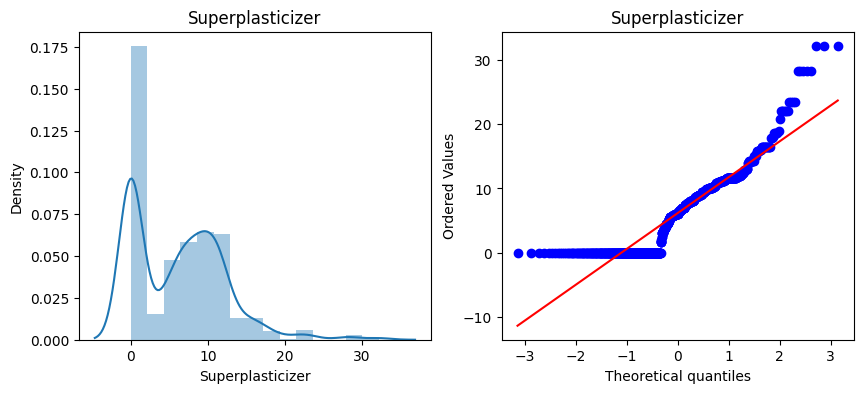

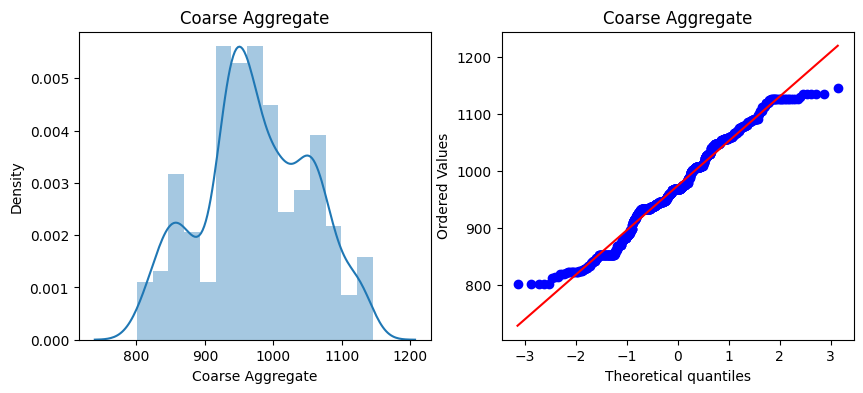

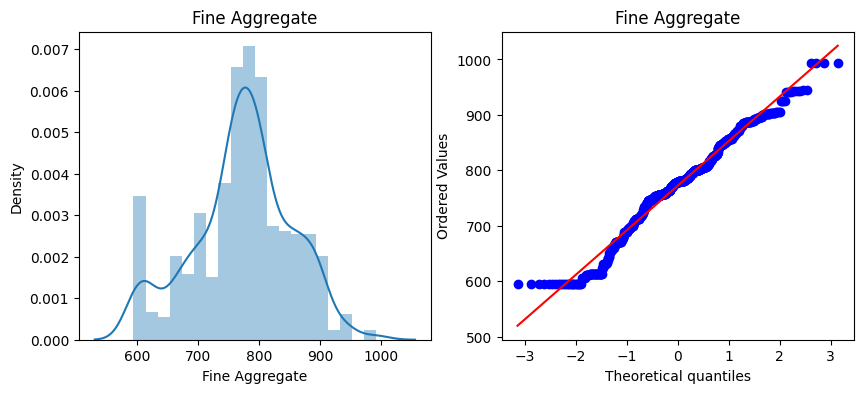

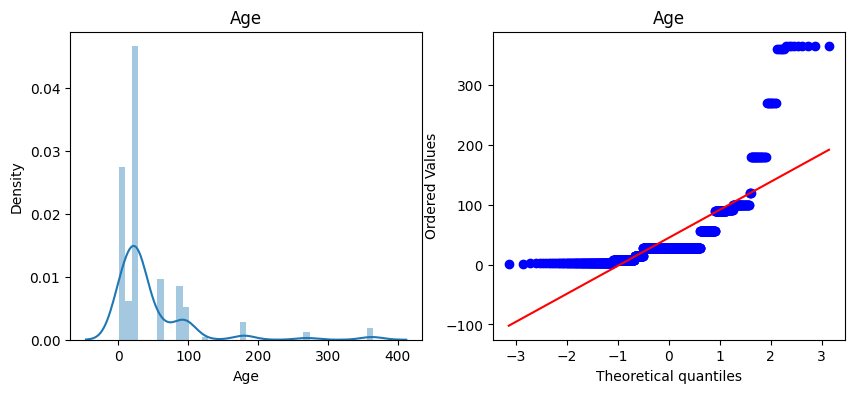

In [10]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

### Box-Cox Transform :

In [11]:
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})  # Box-Cox requires data to be strictly positive

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [12]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

print("R2 score :",r2_score(y_test,y_pred2))

R2 score : 0.8047825011028632


In [13]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
print("Cross Val Score :",np.mean(cross_val_score(lr,X_transformed,y,scoring='r2')))

Cross Val Score : 0.6658537935430977


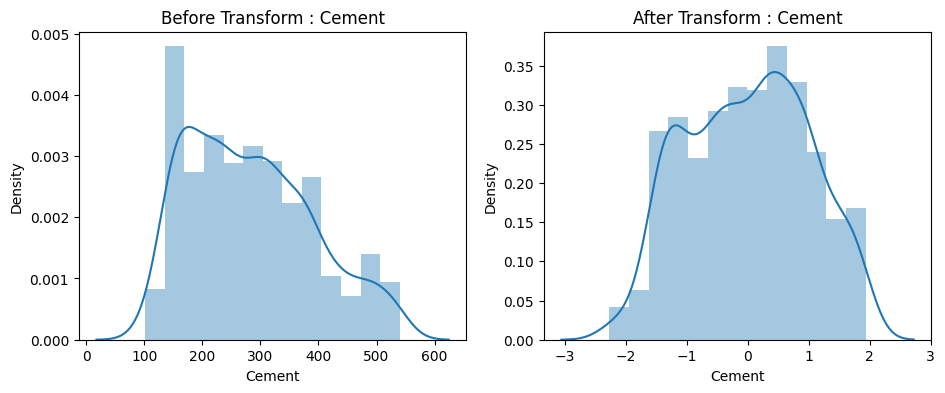

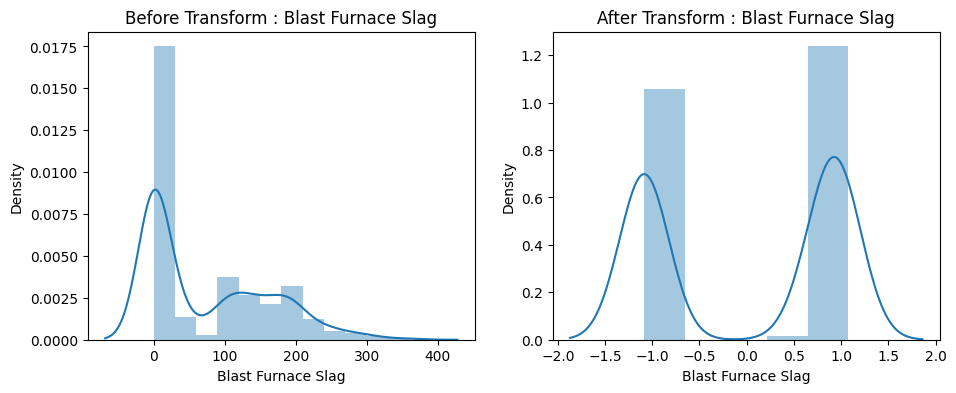

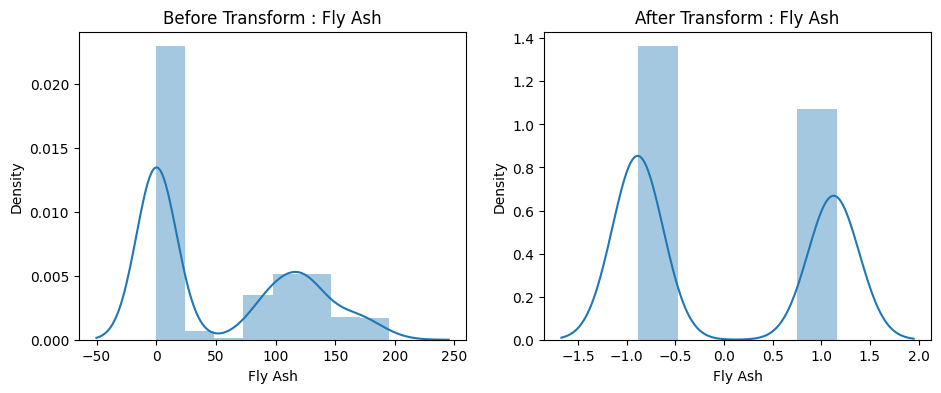

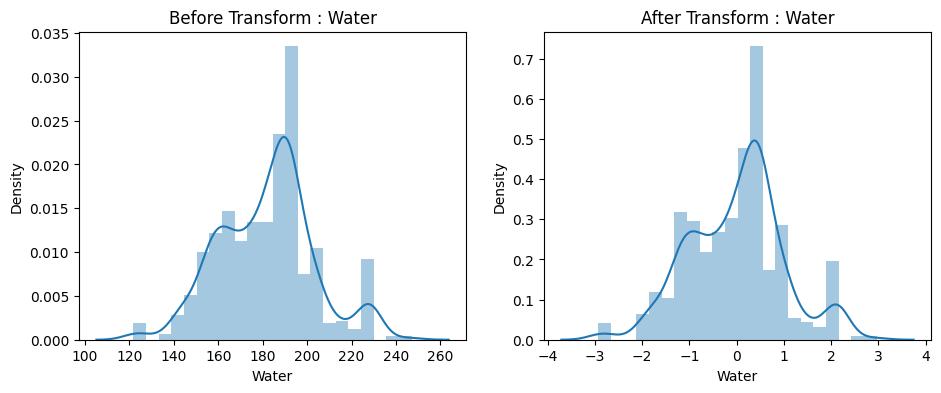

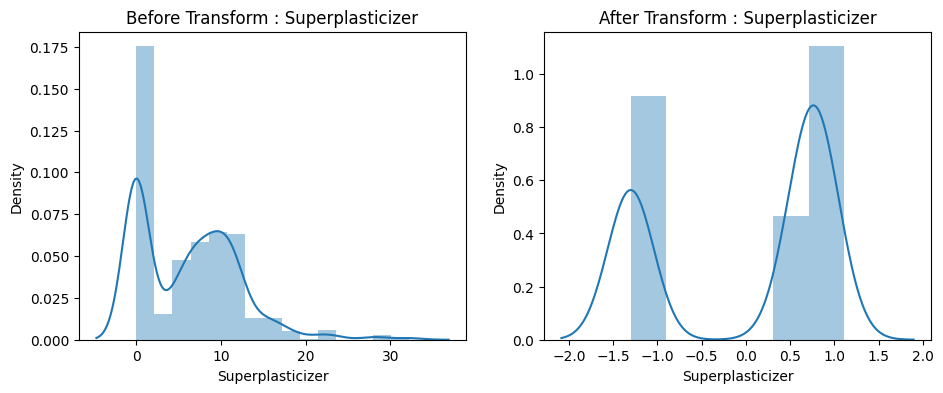

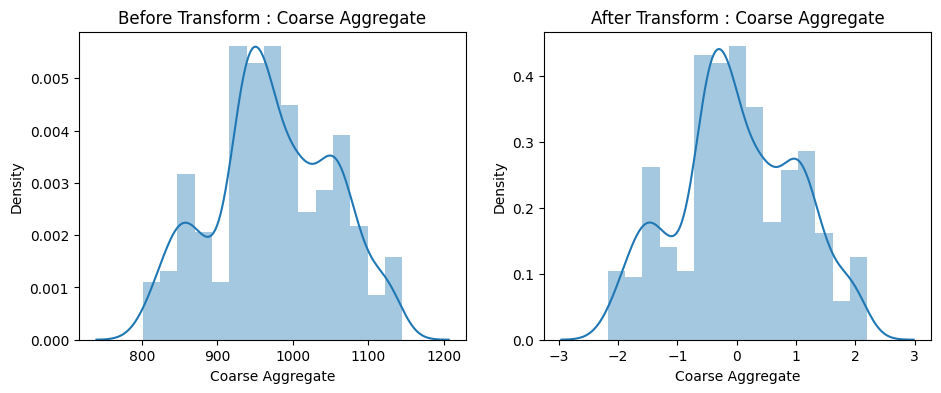

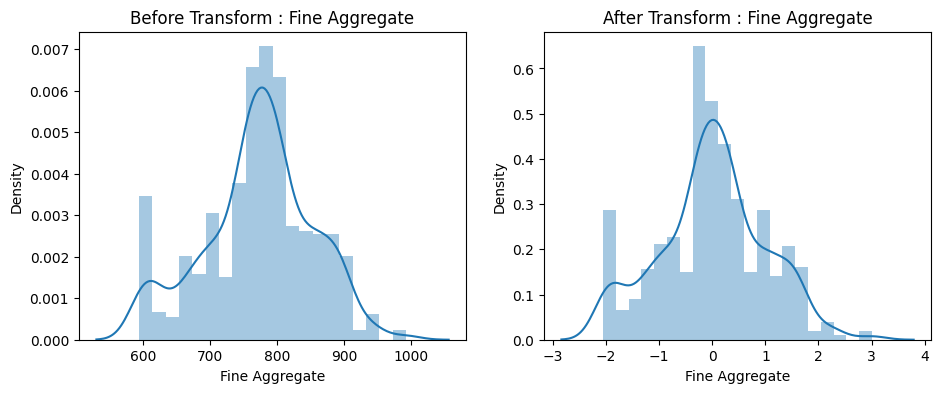

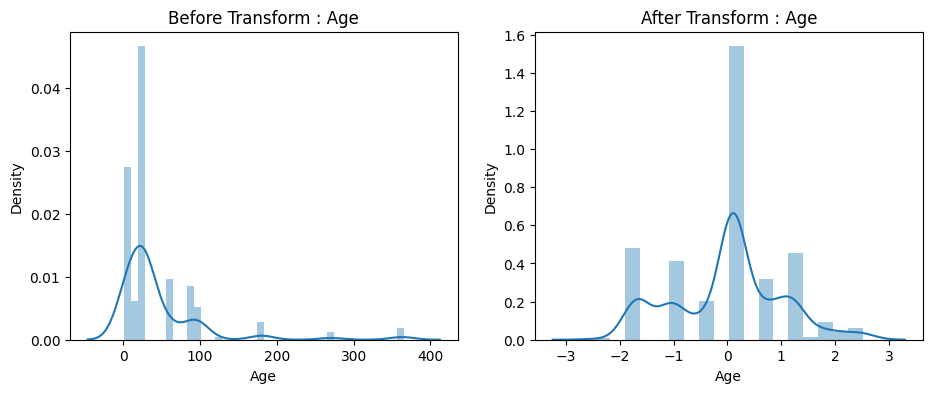

In [14]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(11,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(f"Before Transform : {col}")

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(f"After Transform : {col}")

    plt.show()

### Yeo-Johnson Transform :

In [15]:
pt1 = PowerTransformer()   # Default : Yeo-Johnson Transform

X_train_transformed2 = pt1.fit_transform(X_train)   # Yeo-Johnson can handle positive and negative values
X_test_transformed2 = pt1.transform(X_test)

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [16]:
lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)     

print("R2 Score :",r2_score(y_test,y_pred3))

R2 Score : 0.8161906513354853


In [17]:
# Applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
print("Cross Val Score :",np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2')))

Cross Val Score : 0.6834625141500864


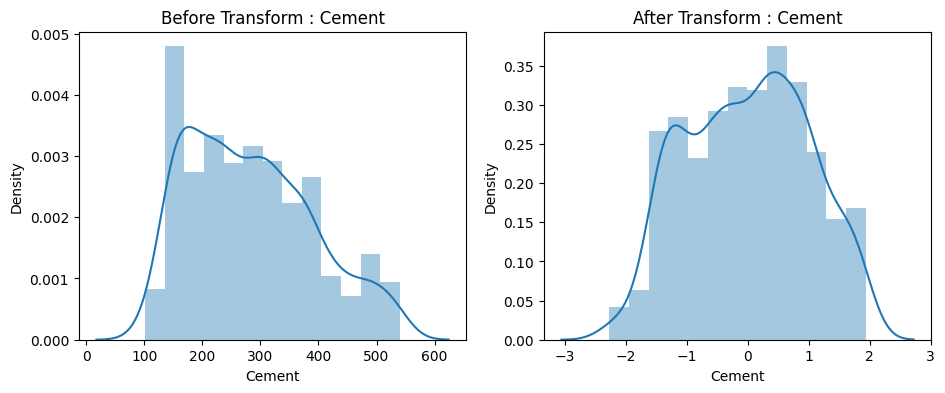

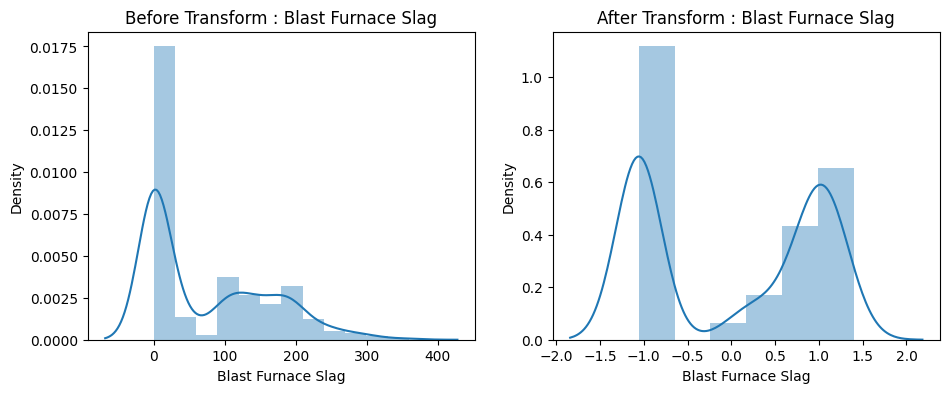

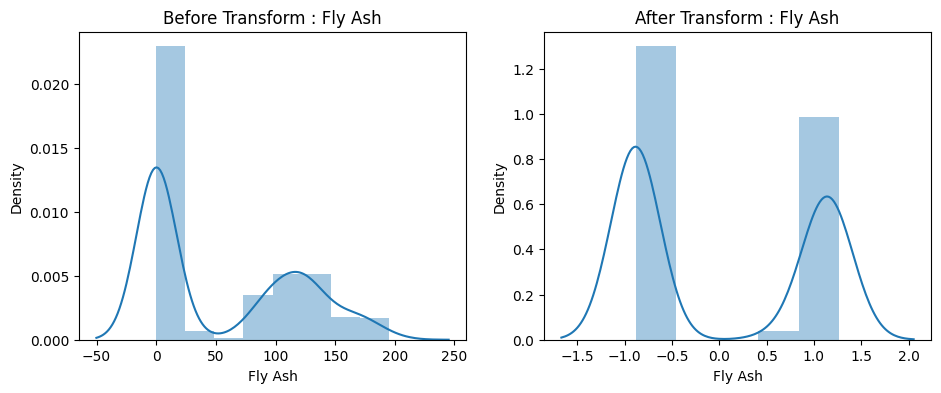

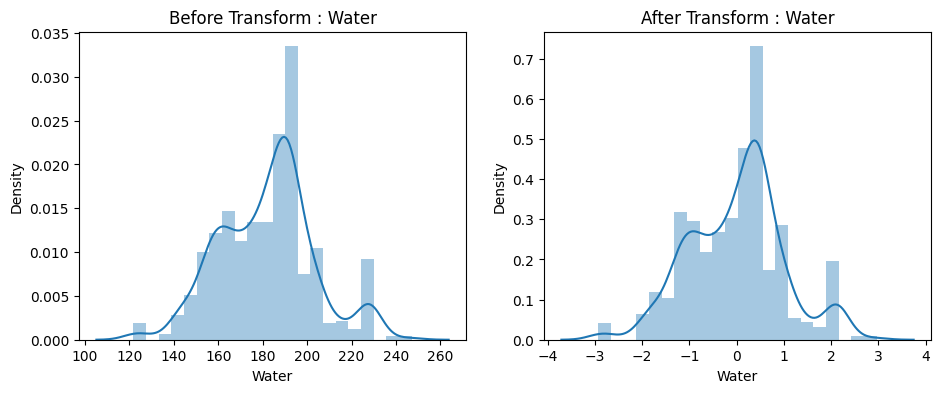

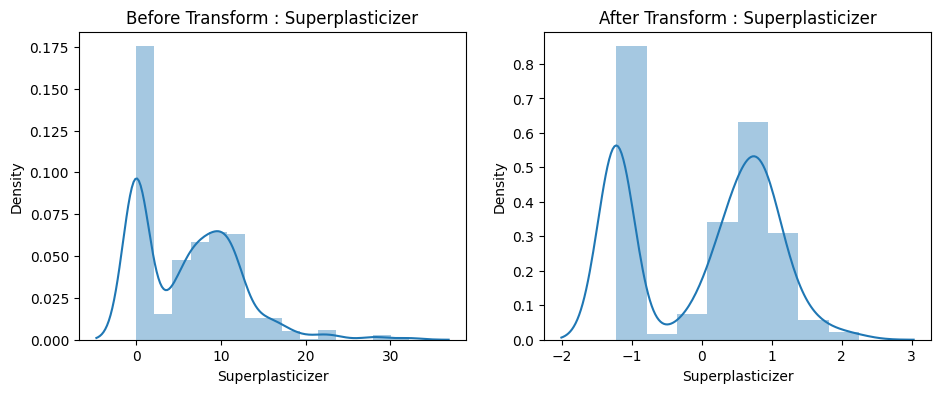

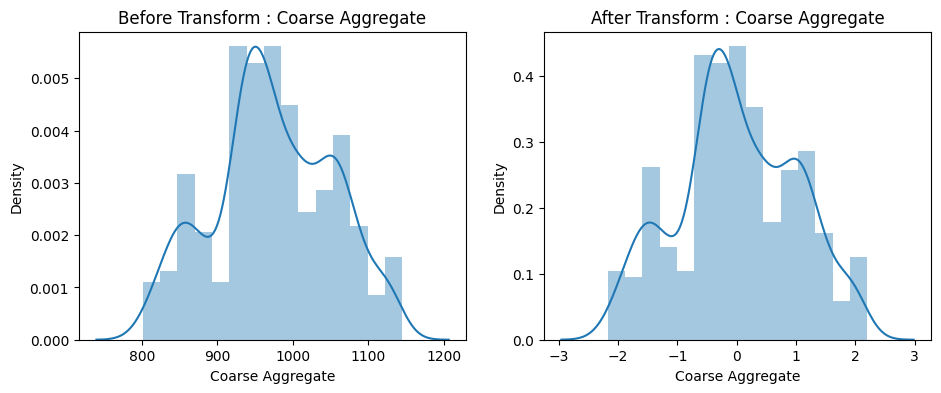

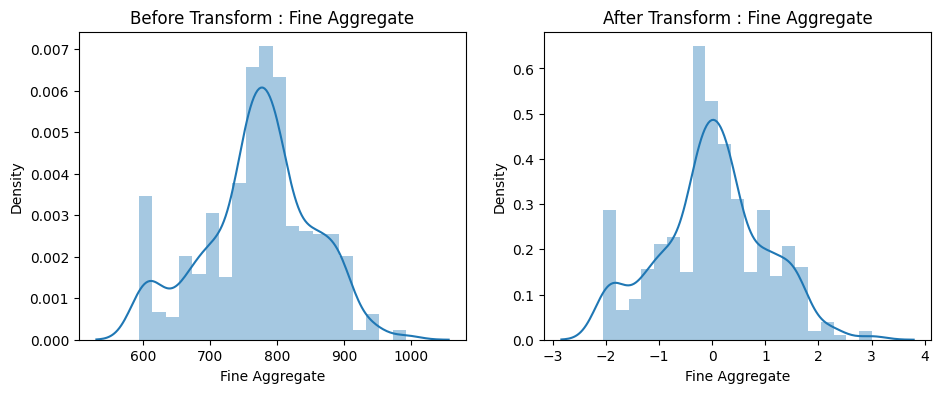

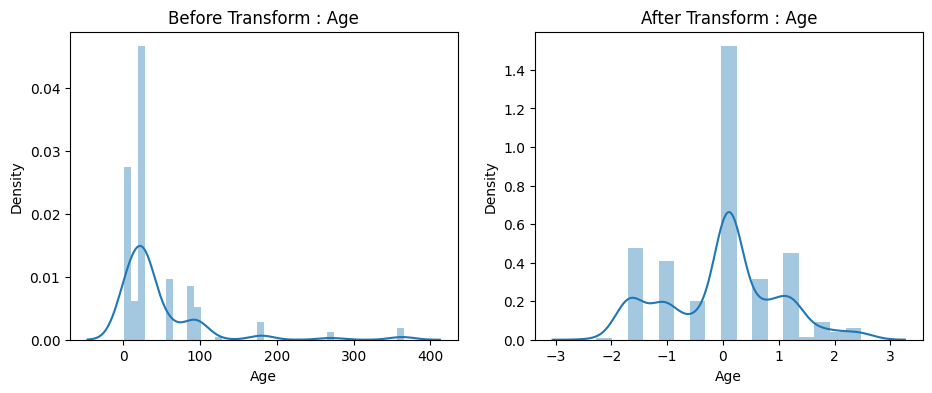

In [18]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

# Before and after comparision for Yeo-Johnson

for col in X_train_transformed2.columns:
    plt.figure(figsize=(11,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(f"Before Transform : {col}")

    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(f"After Transform : {col}")

    plt.show()

In [19]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830763,1.783100
7,Age,0.001771,0.019885


### NOTE :

Function Transformers and Power Transformers are used to make the data more `Gaussian-like[Normal Distribution]`.
Generally, `Power transformers` are used as they show better results